## Plots from the Paper

In [1]:
import matplotlib as mpl

mpl.rcParams["axes.titlesize"] = 14.
mpl.rcParams["axes.labelsize"] = 12.
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['font.sans-serif'] = "Arial"

cm = 1/2.54  # centimeters in inches

Interpretation: The more you control the stream statistics, the more the PRI depends on the controls of the Lexicon.

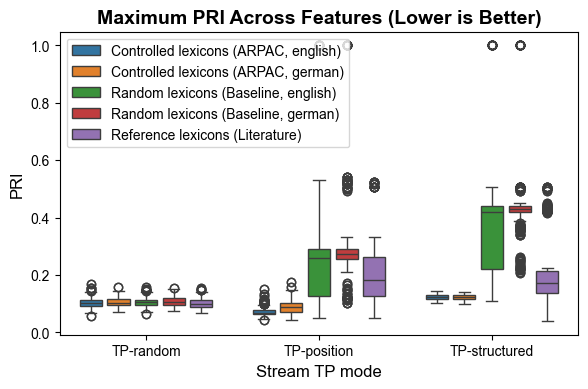

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

tp_modes = ["TP-random position-random", "TP-random position-fixed", "TP-structured"]
tp_modes_pretty = ["TP-random", "TP-position", "TP-structured"]

df = pd.read_csv("results/analysis_full_dataset.csv").replace(tp_modes, tp_modes_pretty)

_, ax = plt.subplots(figsize=(17*cm, 10*cm))
sns.boxplot(df[df["Feature"] == "max"], x="Stream TP mode", y="PRI", hue="Control", order=tp_modes_pretty, gap=0.2)
plt.title("Maximum PRI Across Features (Lower is Better)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

os.makedirs("results", exist_ok=True)
plt.savefig(os.path.join("results", "lexicon_pris_summary.pdf"), dpi=600)

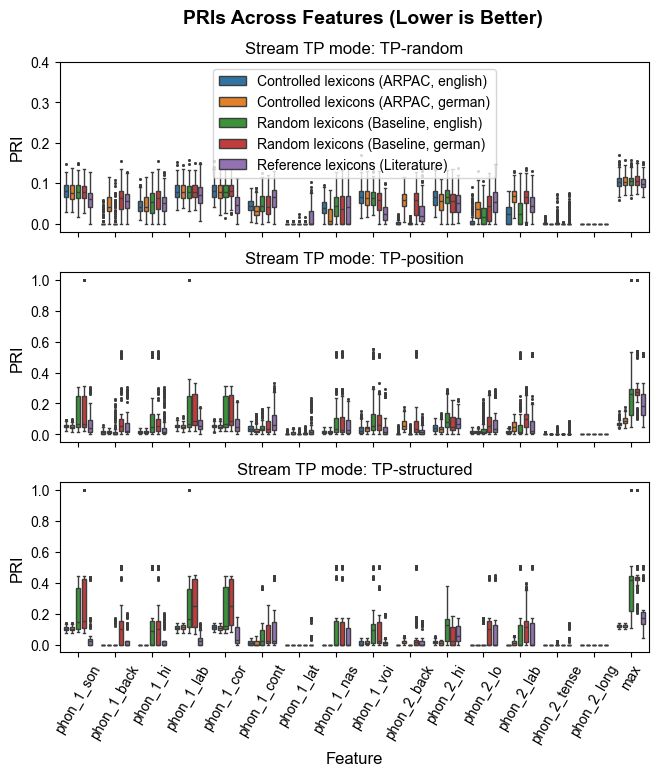

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

_, axs = plt.subplots(3, 1, figsize=(17*cm, 20*cm), layout="tight", sharex=True)
labels = ['Controlled\nlexicons (ARC)',
 'Reference\nlexicons (Literature)',
 'Random\nlexicons (Baseline)']

for i, tp_mode in enumerate(tp_modes_pretty):
    sns.boxplot(df[df["Stream TP mode"] == tp_mode], x="Feature", y="PRI", hue="Control", ax=axs[i], fliersize=1, gap=0.3)
    axs[i].set_title(f"Stream TP mode: {tp_mode}", weight="normal", size=12)
    if i == 0:
        axs[i].set(ylim=(-0.02, 0.4))
        # axs[i].legend(labels)
        # sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))
        sns.move_legend(axs[i], "upper left")
        handles, labels = axs[i].get_legend_handles_labels()
        axs[i].legend(handles=handles, labels=labels)
        
    else:
        axs[i].legend([],[], frameon=False)
locs, labls = plt.xticks()
plt.xticks(locs, labls, rotation=60)
plt.suptitle(f"PRIs Across Features (Lower is Better)", weight="bold", size=14, x=0.55)
plt.savefig("results/lexicon_pri.pdf", dpi=600)

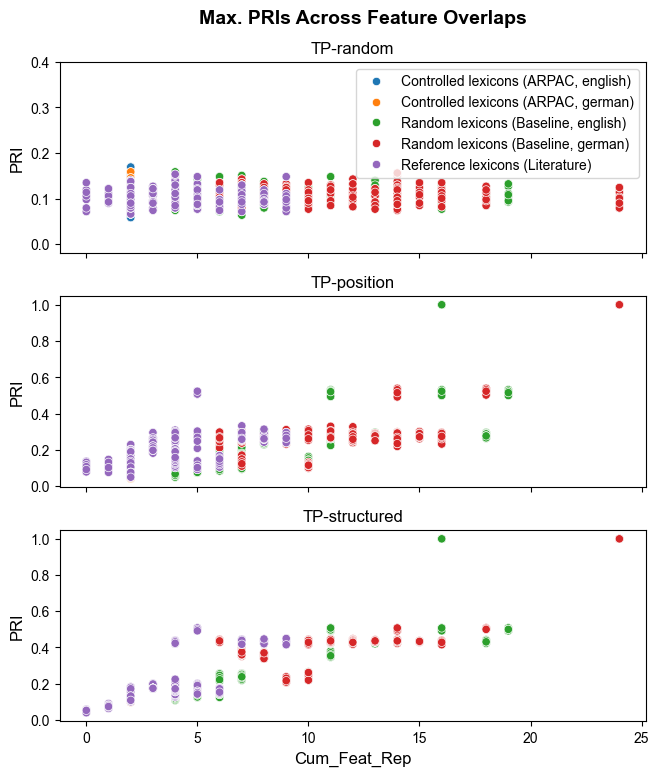

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

_, axs = plt.subplots(3, 1, figsize=(17*cm, 20*cm), layout="tight", sharex=True)
labels = ['Controlled\nlexicons (ARC)',
 'Reference\nlexicons (Literature)',
 'Random\nlexicons (Baseline)']

for i, tp_mode in enumerate(tp_modes_pretty):
    sns.scatterplot(data=df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")], x="Cum_Feat_Rep", y="PRI", hue="Control", ax=axs[i])
    axs[i].set_title(f"{tp_mode}", weight="normal", size=12)
    if i == 0:
        axs[i].set(ylim=(-0.02, 0.4))
        # axs[i].legend(labels)
        # sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))
        sns.move_legend(axs[i], "upper left")
        handles, labels = axs[i].get_legend_handles_labels()
        axs[i].legend(handles=handles, labels=labels)
        
    else:
        axs[i].legend([],[], frameon=False)
locs, labls = plt.xticks()
#plt.xticks(locs, labls, rotation=60)
plt.suptitle(f"Max. PRIs Across Feature Overlaps", weight="bold", size=14, x=0.55)
plt.savefig("results/lexicon_pri.pdf", dpi=600)